In [25]:
import pylidc as pl
import matplotlib.pyplot as plt
import numpy as np
import math

import h5py
import SimpleITK as sitk  
import nibabel as nib

In [2]:
ann = pl.query(pl.Annotation).filter(pl.Annotation.malignancy != 3)

In [3]:
ann.count()

4253

In [4]:
annotation_dict = {}

In [5]:
for annotation in ann:
    if annotation.scan_id in annotation_dict:
        annotation_dict[annotation.scan_id]  += 1   
    else:
        annotation_dict[annotation.scan_id]  = 1           
    print(annotation.scan_id)

1
1
1
1
1
1
1
1
2
2
2
2
2
2
3
4
5
5
6
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
10
10
10
11
11
11
12
12
12
12
13
13
14
14
14
14
14
14
14
14
14
14
15
15
15
15
16
16
16
17
17
17
17
18
18
18
18
18
19
19
20
20
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
25
25
25
26
26
26
27
27
27
27
27
27
27
27
27
27
27
28
28
29
29
29
29
29
29
29
29
29
30
30
31
31
32
32
32
32
32
33
34
34
34
34
35
35
35
35
35
35
35
35
36
37
37
38
38
38
38
38
38
38
40
41
42
42
42
42
42
42
42
42
42
42
42
42
44
44
44
44
45
45
45
47
47
48
48
48
48
48
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
51
51
52
52
52
52
53
53
53
53
53
53
53
53
53
53
53
54
54
54
54
54
54
54
54
54
55
55
55
55
55
55
55
55
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
57
57
57
57
57
57
57
57
58
58
58
59
59
59
59
59
59
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
61
61
62
62
62
62
62
62
62
62
63
63

In [6]:
new_dict = {}
for annot in annotation_dict:
    if (annotation_dict[annot] >=4):
        new_dict[annot] = annotation_dict[annot] 

In [7]:
# Query for all CT scans with desired traits.
scans = pl.query(pl.Scan)
print(scans.count())
# => 31

pid = 'LIDC-IDRI-0078'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

1018


In [8]:
print(len(scan.annotations))

13


In [9]:
nods = scan.cluster_annotations()

print("%s has %d nodules." % (scan, len(nods)))
# => Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.
Nodule 1 has 4 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 1 annotations.
Nodule 4 has 4 annotations.


In [10]:
nods[0]

[Annotation(id=2,scan_id=1),
 Annotation(id=6,scan_id=1),
 Annotation(id=10,scan_id=1),
 Annotation(id=13,scan_id=1)]

In [11]:
ann = pl.query(pl.Annotation).filter(pl.Annotation.scan_id == 1)

In [12]:
for a in ann:
    print(a)

Annotation(id=1,scan_id=1)
Annotation(id=2,scan_id=1)
Annotation(id=3,scan_id=1)
Annotation(id=4,scan_id=1)
Annotation(id=5,scan_id=1)
Annotation(id=6,scan_id=1)
Annotation(id=7,scan_id=1)
Annotation(id=8,scan_id=1)
Annotation(id=9,scan_id=1)
Annotation(id=10,scan_id=1)
Annotation(id=11,scan_id=1)
Annotation(id=12,scan_id=1)
Annotation(id=13,scan_id=1)


In [13]:
ann.filter(pl.Annotation.id == 1).first()

Annotation(id=1,scan_id=1)

2
Loading dicom files ... This may take a moment.
[312.30982368 331.90680101  25.64987406]
(128, 128, 128)


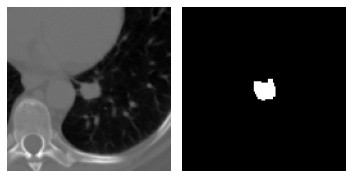

6
Loading dicom files ... This may take a moment.
[309.91796875 328.60546875  25.41015625]
(128, 128, 128)


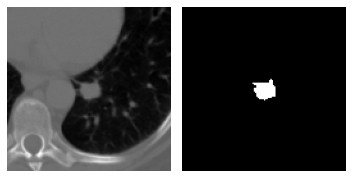

10
Loading dicom files ... This may take a moment.
[309.88293651 327.91666667  25.17261905]
(128, 128, 128)


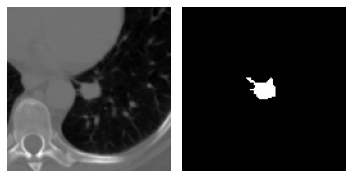

13
Loading dicom files ... This may take a moment.
[313.88050314 332.55660377  25.48113208]
(128, 128, 128)


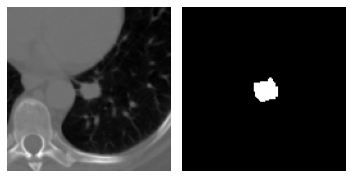

In [29]:
get_points = True
pts = None

for idx, item in enumerate(nods[0]):
    print(item.id)
    
    annoation_volume = ann.filter(pl.Annotation.id == item.id).first()
    if get_points:
        vol, mask, pts = annoation_volume.uniform_cubic_resample(180, return_irp_pts= get_points )
        get_points = False
    else:
        vol, mask= annoation_volume.uniform_cubic_resample(180, irp_pts =pts, return_irp_pts= get_points )
    # bbox = annoation_volume.bbox()
    # print(bbox)
    print(annoation_volume.centroid)
    
    # vol = annoation_volume.scan.to_volume()
    # print(vol[bbox].shape)
    # pad_amount = tuple(map(lambda i, j: i - j, (120, 120, 120) , vol[bbox].shape))
    # print(pad_amount)
    # print(vol.shape)
    # padding = [(math.floor(pad_amount[0]/2),math.floor(pad_amount[0]/2)),(math.floor(pad_amount[1]/2),math.floor(pad_amount[1]/2)),(math.floor(pad_amount[2]/2),math.floor(pad_amount[2]/2))]
    # # new_annotation = np.zeroes((annoation_volume.centroid[0] + 120))
    # # for idx, dim in enumerate(annoation_volume.shape):
    # #     pos_valume = annoation_volume.centroid[idx] + 120
    # #     if pos_valume > dim:


    # mask = annoation_volume.boolean_mask(pad=padding)
    # bbox = annoation_volume.bbox(pad=padding)

    # missing_amount = tuple(map(lambda i, j: i - j, (120, 120, 120) , mask.shape)) 
    # new_mask = np.zeros((120, 120, 120))
    # print(math.floor(missing_amount[0]/2),math.floor(missing_amount[0]/2)+mask.shape[0])
    # print(math.floor(missing_amount[1]/2),math.floor(missing_amount[1]/2)+mask.shape[1])
    # print(math.floor(missing_amount[2]/2),math.floor(missing_amount[2]/2)+mask.shape[2])
    # new_mask[math.floor(missing_amount[0]/2):math.floor(missing_amount[0]/2)+mask.shape[0], math.floor(missing_amount[1]/2):math.floor(missing_amount[1]/2)+mask.shape[1], math.floor(missing_amount[2]/2):math.floor(missing_amount[2]/2)+mask.shape[2]]    = mask
    # print(vol[bbox].shape)
    # print(mask.shape)
    # print(new_mask.shape)
    # print(np.where(new_mask == 1.0))


    vol = vol[26:154, 26:154, 26:154]
    mask = mask[26:154, 26:154, 26:154]
    print(vol.shape)
    fig,ax = plt.subplots(1,2,figsize=(5,3))

    ax[0].imshow(vol[:,:,65], cmap=plt.cm.gray)
    ax[0].axis('off')

    ax[1].imshow(mask[:,:,65], cmap=plt.cm.gray)
    ax[1].axis('off')

    plt.tight_layout()
    #plt.savefig("../images/mask_bbox.png", bbox_inches="tight")
    plt.show()

    ni_img = nib.Nifti1Image(vol, affine=np.eye(4))
    nib.save(ni_img, f"dicom_volume_{idx+1}.nii")
    ni_img = nib.Nifti1Image(mask.astype(int), affine=np.eye(4))
    nib.save(ni_img, f"label_{idx+1}.nii")
    

        # annoation_volume.visualize_in_3d()
    

In [34]:
item.scan_id

1

In [32]:
img1 = nib.load('dicom_volume_1.nii').get_fdata()
img2 = nib.load('dicom_volume_2.nii').get_fdata()

In [33]:
np.array_equal(img1, img2)

True

Loading dicom files ... This may take a moment.


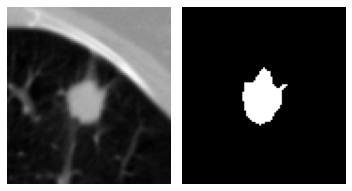

In [5]:
ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()

padding = [(30,30), (30,30), (0,0)]

mask = ann.boolean_mask(pad=padding)
bbox = ann.bbox(pad=padding)

fig,ax = plt.subplots(1,2,figsize=(5,3))

ax[0].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(mask[:,:,2], cmap=plt.cm.gray)
ax[1].axis('off')

plt.tight_layout()
#plt.savefig("../images/mask_bbox.png", bbox_inches="tight")
plt.show()

In [7]:
vol.shape

(512, 512, 87)

C:\Users\320088652\AppData\Local\Programs\Python\Python38\lib\_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]
C:\python_envs\analysis38_env\lib\site-packages\pylidc\Annotation.py:750: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _= marching_cubes(mask.astype(np.float), 0.5,
C:\python_envs\analysis38_env\lib\site-packages\pylidc\Annotation.py:759: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  facecolors=plt.cm.cmap_d[cmap](t))


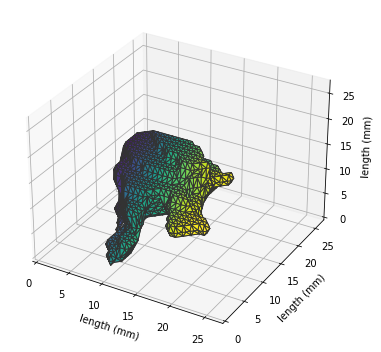

In [3]:
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.lobulation == 5).first()
ann.visualize_in_3d()

Loading dicom files ... This may take a moment.


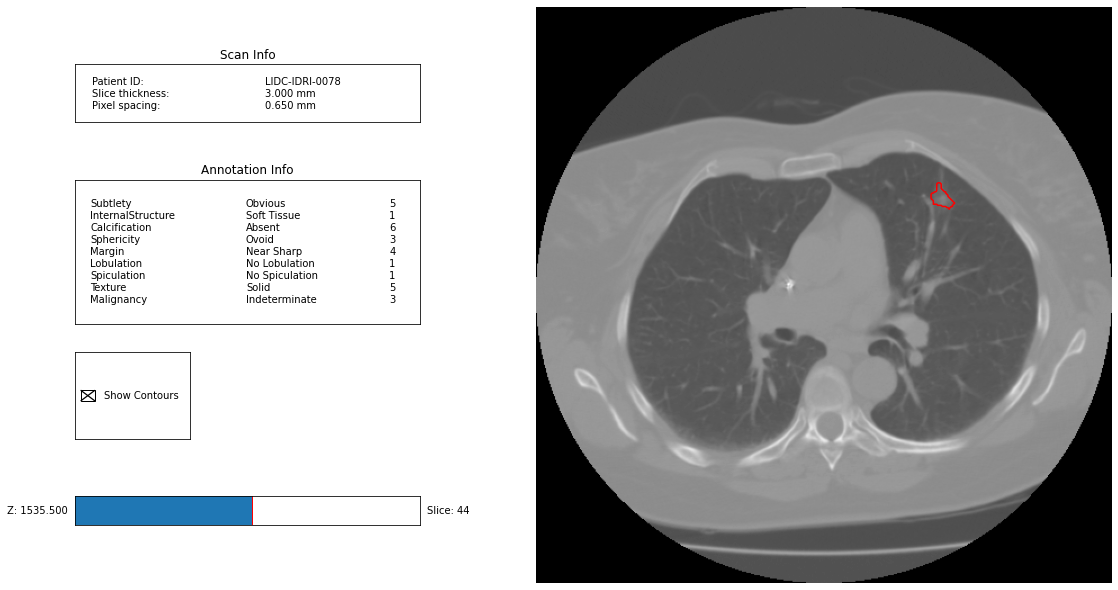

In [52]:
ann = pl.query(pl.Annotation).first()
ann.visualize_in_scan()

In [68]:
vol, mask = ann.uniform_cubic_resample(128)

Loading dicom files ... This may take a moment.


In [69]:
mask.shape

(129, 129, 129)

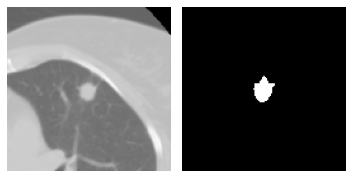

In [73]:
fig,ax = plt.subplots(1,2,figsize=(5,3))

ax[0].imshow(vol[:,:,65], cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(mask[:,:,65], cmap=plt.cm.gray)
ax[1].axis('off')

plt.tight_layout()
#plt.savefig("../images/mask_bbox.png", bbox_inches="tight")
plt.show()

In [1]:

import h5py

In [4]:
f = h5py.File(r'D:\Documents\EMTIC\LIDC\Converted\case_1_nodule_3.h5', 'r')

In [5]:
f.keys()

<KeysViewHDF5 ['label1', 'label2', 'label3', 'label4', 'raw']>